# BigMart Sale Prediction

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [200]:
df = pd.read_csv('Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [201]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [202]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [204]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [205]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [206]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [207]:
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0],inplace=True)

In [208]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [209]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [210]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [211]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017843,0.025258,0.035689,0.006443
Item_Visibility,-0.017843,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025258,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.035689,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.006443,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

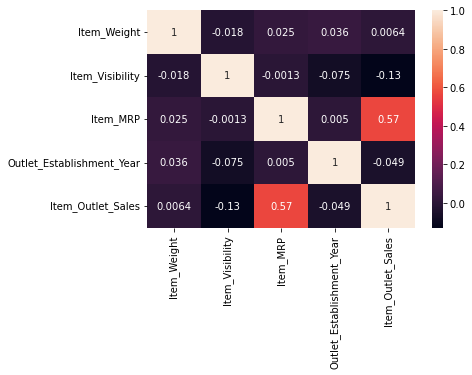

In [212]:
sns.heatmap(df.corr(),annot=True)

In [213]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [214]:
df['New_Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':'Low Fat', 'LF':'Low Fat', 'low fat':'Low Fat','Regular':'Regular','reg':'Regular' })

In [215]:
df['New_Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: New_Item_Fat_Content, dtype: int64

In [216]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [217]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [218]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [219]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [221]:
df['Outlet_Size'].replace({'Medium':2,'Small':3, 'High':1}, inplace=True)
df['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 2':2 ,'Tier 3':3}, inplace=True)
df['Outlet_Type'].replace({'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4},inplace=True)

In [222]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700,Low Fat


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage:

In [224]:
df['New_Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: New_Item_Fat_Content, dtype: int64

In [225]:
df['New_Item_Fat_Content'].replace({'Low Fat':1 ,'Regular':2 },inplace=True)

In [226]:
df.drop(['Item_Identifier','Item_Fat_Content','Outlet_Identifier'],axis = 1, inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   New_Item_Fat_Content       8523 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 666.0+ KB


In [228]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [229]:
df1 = pd.get_dummies(data = df['Item_Type'],drop_first=True)


In [230]:
df1.head(3)

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [231]:
df= df.join(df1)

In [232]:
df.head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0.016047,Dairy,249.8092,1999,2,1,1,3735.1380,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,Soft Drinks,48.2692,2009,2,3,2,443.4228,2,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,Meat,141.6180,1999,2,1,1,2097.2700,1,...,0,0,0,0,1,0,0,0,0,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   New_Item_Fat_Content       8523 non-null   int64  
 10  Breads                     8523 non-null   uint8  
 11  Breakfast                  8523 non-null   uint8  
 12  Canned                     8523 non-null   uint8  
 13  Dairy                      8523 non-null   uint8

In [234]:
df.drop(['Item_Type'],axis = 1, inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Size                8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   int64  
 6   Outlet_Type                8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   New_Item_Fat_Content       8523 non-null   int64  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

In [236]:
x = df.drop(['Item_Outlet_Sales'], axis =1)
y = df['Item_Outlet_Sales']

In [237]:
x.shape

(8523, 23)

In [238]:
y.shape

(8523,)

In [239]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

x_train.shape

(6818, 23)

# Linear Regression :

In [240]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [241]:
y_pred = linear_model.predict(x_test)
y_pred

array([ 662.61024952, 1181.87722846, 1805.83827226, ..., 3485.94313812,
       1090.93569515, 2698.82613773])

In [242]:
y_test

1070     952.7598
6305    1133.8574
8504    4138.6128
5562    1657.1762
1410     679.1160
          ...    
376     5715.2272
7708    4832.3764
3812    2972.1312
3928    2492.7552
7654    1717.7640
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [243]:
mse = mean_squared_error(y_test, y_pred)
mse

1661954.96988706

In [244]:
rmse = np.sqrt(mse)
rmse

1289.168324885102

In [245]:
R2 = r2_score(y_test,y_pred)
R2

0.43934666301967984

# Linear Randomized Regression

In [246]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [247]:
R=Ridge(alpha= 0.001)

In [248]:
R.fit(x_train,y_train)

Ridge(alpha=0.001)

In [249]:
y_pred = R.predict(x_test)

In [250]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4393467190062834
RMSE 1289.1682605172002


In [251]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [252]:
l = Lasso(alpha = 0.1)

In [253]:
l.fit(x_train,y_train)

Lasso(alpha=0.1)

In [254]:
y_pred = l.predict(x_test)

In [255]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4394967279994191
RMSE 1288.9957833582084


# Random Forest

In [256]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [257]:
rf_reg = RandomForestRegressor(random_state = 10)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [258]:
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared error:', mse)

Mean Squared error: 1346892.7674857585


In [259]:
rmse = np.sqrt(mse)
rmse

1160.55709359159

In [260]:
R2= r2_score(y_test,y_pred)
R2

0.5456315373593634

# XGBoost

In [261]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [262]:
from xgboost import XGBRegressor 

In [263]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test = train_test_split(x,y,test_size= 0.2,train_size=0.8,random_state = 42)

In [264]:
model = XGBRegressor()

In [265]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [266]:
y_pred= model.predict(x_test)

In [267]:
y_pred

array([ 718.079 , 1258.3534, 3712.6768, ..., 2873.4915, 1761.8292,
       2581.376 ], dtype=float32)

In [268]:
from sklearn.metrics import mean_squared_error

In [269]:
mse = mean_squared_error(y_test , y_pred)
mse

4698109.052450861

In [270]:
rmse = np.sqrt(mse)
rmse

2167.512180461937

In [271]:
R2 = r2_score(y_test,y_pred)
R2

-0.7285359799046567

In [272]:
from sklearn.model_selection import cross_val_score
val = XGBRegressor(objective = 'reg:squarederror')

In [273]:
scores = cross_val_score(val , x,y,
                        scoring = 'neg_mean_squared_error',
                        cv = 10)

In [274]:
scores

array([-1448214.94929402, -1314706.43079333, -1445667.94814782,
       -1273645.24544861, -1357457.06859751, -1300511.73019049,
       -1336145.91389851, -1400746.64492823, -1299050.20216038,
       -1401653.44643121])

In [275]:
rmse = np.sqrt(-scores)

In [276]:
rmse

array([1203.41802766, 1146.60648472, 1202.35932572, 1128.55892423,
       1165.099596  , 1140.39981155, 1155.9177799 , 1183.53142963,
       1139.75883509, 1183.91445909])

In [277]:
R2 = r2_score(y_test,y_pred)

In [279]:
-(R2)

0.7285359799046567